In [1]:
path = '/home/math_pavani/mackenzie/DADOS/MICRODADOS_ENEM_2023.csv'

In [2]:
import polars as pl

# Carregamento preguiçoso (lazy)
lf = pl.scan_csv(path,
                 separator=';', 
                 encoding='utf8-lossy',)

# Exemplo: selecionar e filtrar apenas o necessário
colunas_desejadas = [
    "TP_ESCOLA",            # Tipo de escola
    "NU_NOTA_CN",           # Nota Ciências da Natureza
    "NU_NOTA_CH",           # Nota Ciências Humanas
    "NU_NOTA_LC",           # Linguagens
    "NU_NOTA_MT",           # Matemática
    "NU_NOTA_REDACAO",      # Redação
]

# Filtra apenas escolas públicas (2) e privadas (3)
lf_filtrado = (
    lf.select(colunas_desejadas)
      .filter(pl.col("TP_ESCOLA").is_in([2, 3]))
)

# Coleta (transforma em DataFrame em memória)
df = lf_filtrado.collect()


In [3]:
df

TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
i64,f64,f64,f64,f64,i64
2,459.0,508.5,507.2,466.7,880
2,402.5,379.2,446.9,338.3,560
2,608.2,667.6,607.9,691.9,780
2,null,null,null,null,null
2,515.7,553.1,544.4,437.0,880
…,…,…,…,…,…
3,444.0,511.4,514.8,444.9,600
2,476.2,542.9,545.2,530.5,600
2,null,null,null,null,null


          NU_NOTA_CN                                                  \
               count    mean    std  min    25%    50%    75%    max   
TP_ESCOLA                                                              
Privada     221705.0  548.47  83.99  0.0  494.5  552.5  603.0  868.4   
Pública     833439.0  473.52  77.73  0.0  426.0  473.2  524.6  844.3   

          NU_NOTA_CH          ... NU_NOTA_MT        NU_NOTA_REDACAO          \
               count    mean  ...        75%    max           count    mean   
TP_ESCOLA                     ...                                             
Privada     224775.0  573.92  ...      718.8  958.6        224775.0  762.63   
Pública     874837.0  501.22  ...      586.1  958.6        874837.0  583.75   

                                                     
              std  min    25%    50%    75%     max  
TP_ESCOLA                                            
Privada    163.99  0.0  660.0  800.0  900.0  1000.0  
Pública    219.73  0.0  480

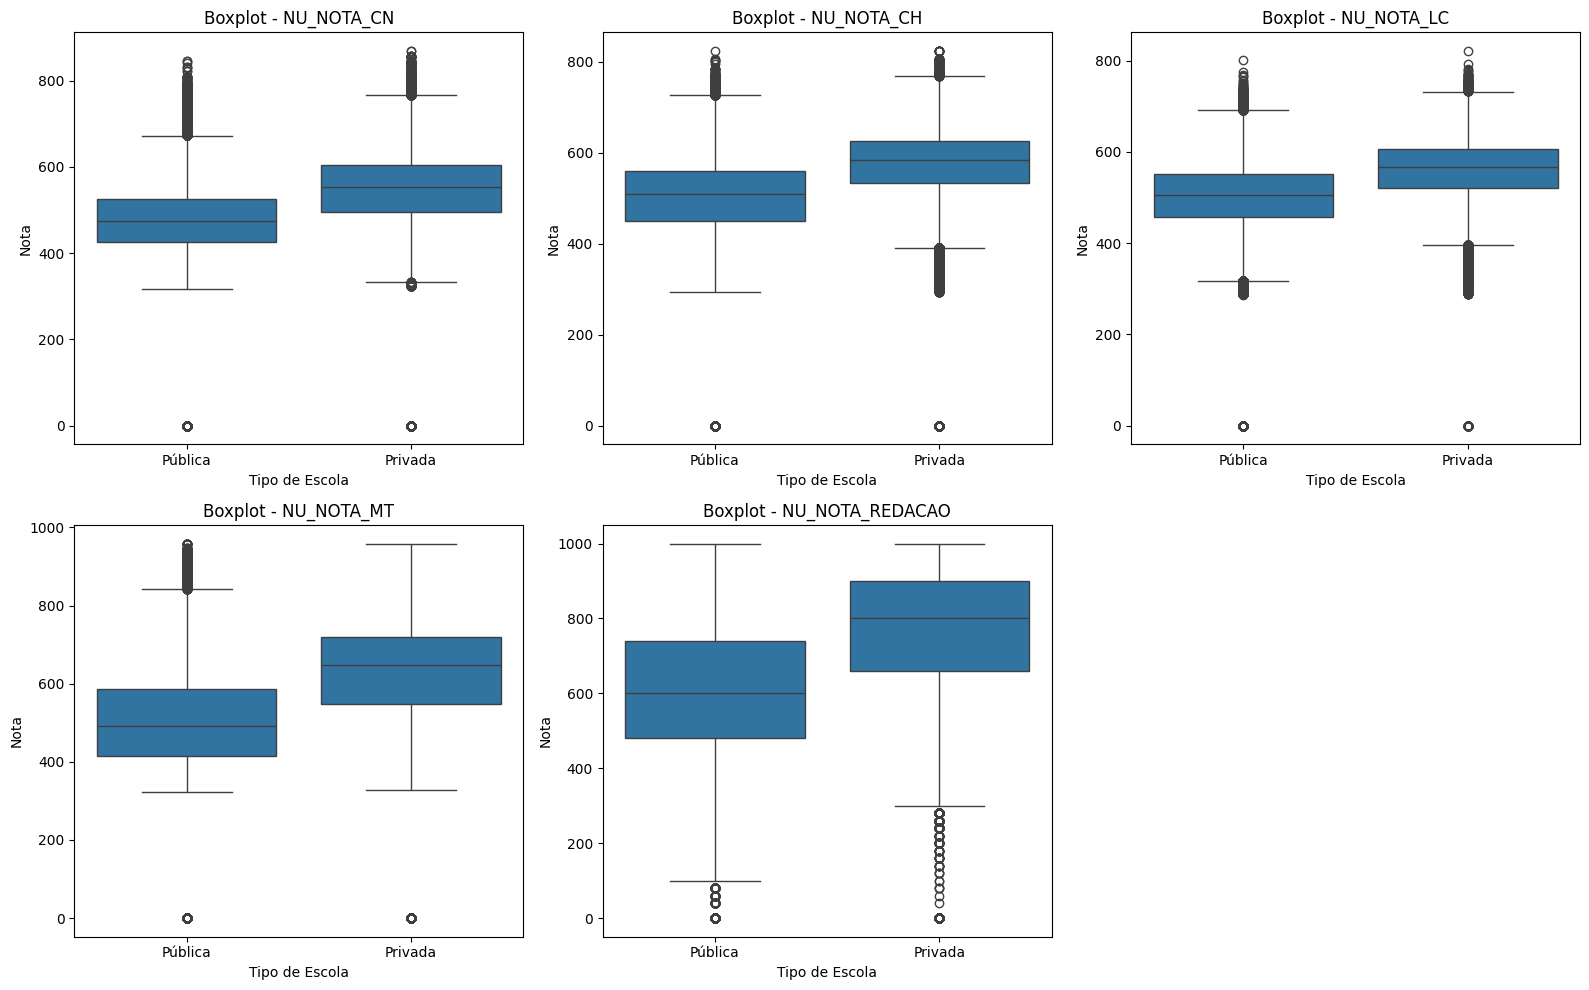

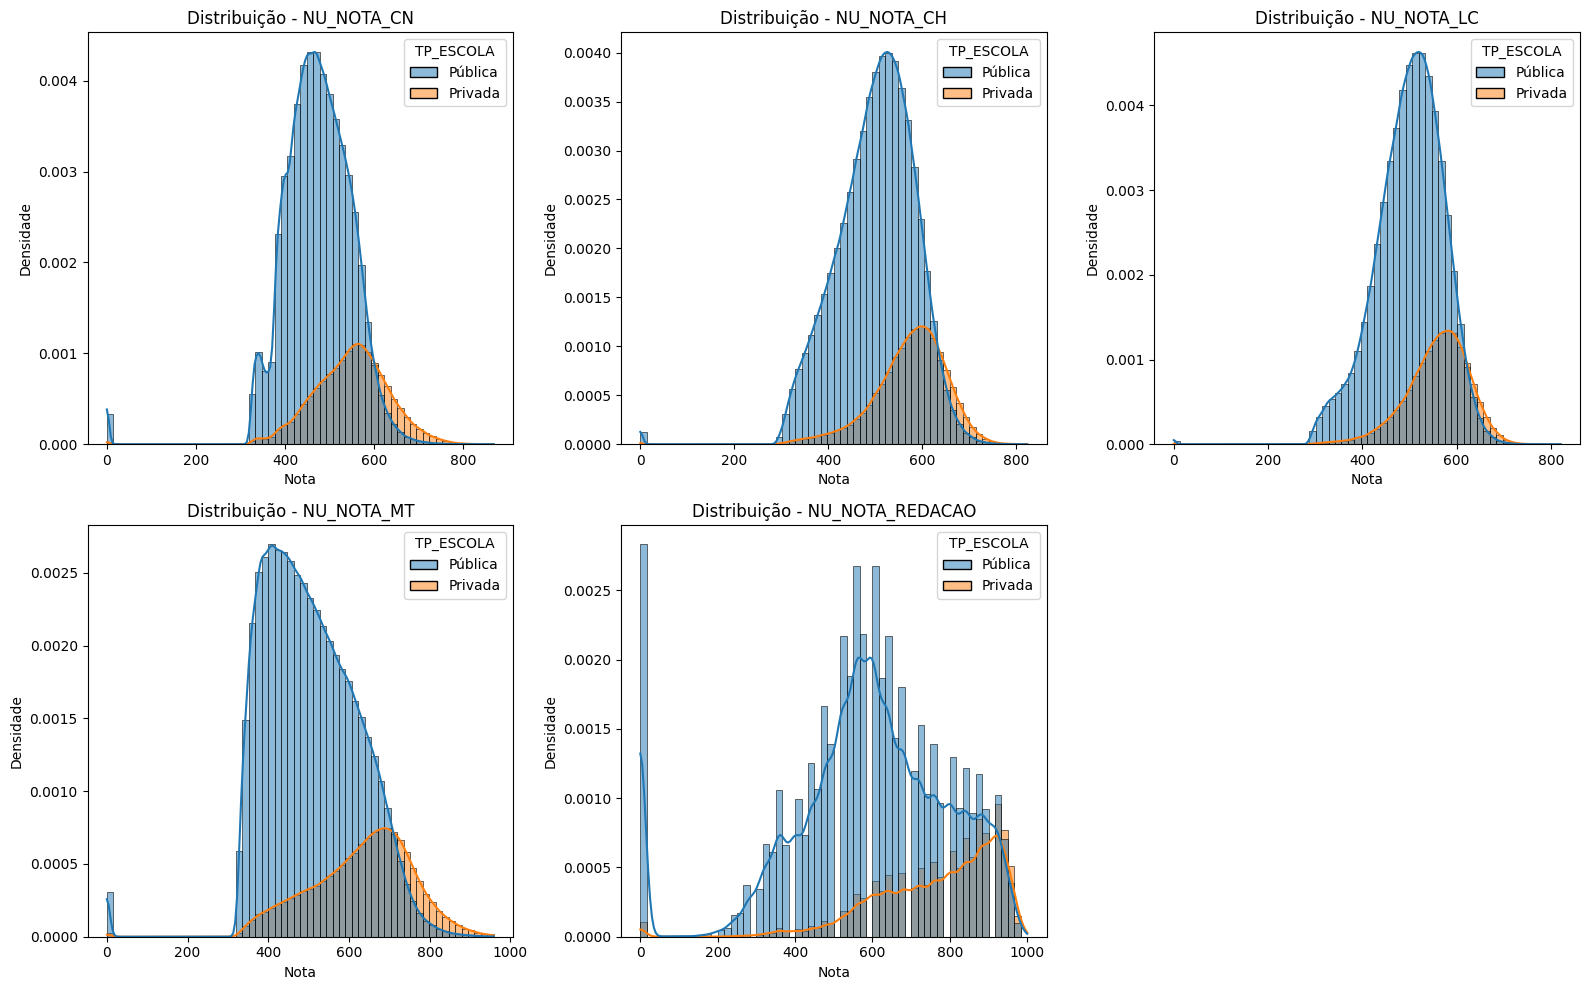

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Conversão para Pandas
df_pd = df.to_pandas()

# 6. Mapeamento do tipo de escola
df_pd["TP_ESCOLA"] = df_pd["TP_ESCOLA"].map({2: "Pública", 3: "Privada"})

# 7. Conversão explícita das notas para float
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
df_pd[notas] = df_pd[notas].apply(pd.to_numeric, errors="coerce")

# 8. Estatísticas descritivas agrupadas por tipo de escola
estatisticas = df_pd.groupby("TP_ESCOLA")[notas].describe().round(2)
print(estatisticas)

# 9. Boxplots por nota
plt.figure(figsize=(16, 10))
for i, nota in enumerate(notas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_pd, x="TP_ESCOLA", y=nota)
    plt.title(f"Boxplot - {nota}")
    plt.xlabel("Tipo de Escola")
    plt.ylabel("Nota")
plt.tight_layout()
plt.show()

# 10. Histogramas com KDE
plt.figure(figsize=(16, 10))
for i, nota in enumerate(notas, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_pd, x=nota, hue="TP_ESCOLA", kde=True, stat="density", bins=60, alpha=0.5)
    plt.title(f"Distribuição - {nota}")
    plt.xlabel("Nota")
    plt.ylabel("Densidade")
plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import normaltest

for nota in notas:
    for grupo in ["Pública", "Privada"]:
        stat, p = normaltest(df_pd[df_pd["TP_ESCOLA"] == grupo][nota].dropna())
        print(f"{nota} - {grupo} | p-valor normalidade: {p:.4f}")


NU_NOTA_CN - Pública | p-valor normalidade: 0.0000
NU_NOTA_CN - Privada | p-valor normalidade: 0.0000
NU_NOTA_CH - Pública | p-valor normalidade: 0.0000
NU_NOTA_CH - Privada | p-valor normalidade: 0.0000
NU_NOTA_LC - Pública | p-valor normalidade: 0.0000
NU_NOTA_LC - Privada | p-valor normalidade: 0.0000
NU_NOTA_MT - Pública | p-valor normalidade: 0.0000
NU_NOTA_MT - Privada | p-valor normalidade: 0.0000
NU_NOTA_REDACAO - Pública | p-valor normalidade: 0.0000
NU_NOTA_REDACAO - Privada | p-valor normalidade: 0.0000


In [10]:
from scipy.stats import mannwhitneyu

for nota in notas:
    grupo_pub = df_pd[df_pd["TP_ESCOLA"] == "Pública"][nota].dropna()
    grupo_priv = df_pd[df_pd["TP_ESCOLA"] == "Privada"][nota].dropna()

    stat, p = mannwhitneyu(grupo_pub, grupo_priv, alternative='two-sided')
    print(f"{nota} | p-valor Mann-Whitney: {p:.4f}")



NU_NOTA_CN | p-valor Mann-Whitney: 0.0000
NU_NOTA_CH | p-valor Mann-Whitney: 0.0000
NU_NOTA_LC | p-valor Mann-Whitney: 0.0000
NU_NOTA_MT | p-valor Mann-Whitney: 0.0000
NU_NOTA_REDACAO | p-valor Mann-Whitney: 0.0000


In [5]:
import pandas as pd
df_pd = df.to_pandas()
df_pd

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2,459.0,508.5,507.2,466.7,880.0
1,2,402.5,379.2,446.9,338.3,560.0
2,2,608.2,667.6,607.9,691.9,780.0
3,2,NaN,NaN,NaN,NaN,NaN
4,2,515.7,553.1,544.4,437.0,880.0
...,...,...,...,...,...,...
1401154,3,444.0,511.4,514.8,444.9,600.0
1401155,2,476.2,542.9,545.2,530.5,600.0
1401156,2,NaN,NaN,NaN,NaN,NaN
1401157,3,515.7,539.0,536.0,569.0,600.0


In [ ]:
# filtrar por escola e disciplina

df_pub = df_pd[df_pd["TP_ESCOLA"] == 2].sort_values(by='NU_NOTA_MT').reset_index(drop=True)

df_pri = df_pd[df_pd["TP_ESCOLA"] == 3].sort_values(by='NU_NOTA_MT').reset_index(drop=True)

In [7]:
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

media_df = df_pd.melt(id_vars="TP_ESCOLA", value_vars=notas, var_name="Prova", value_name="Nota")

media_df

,TP_ESCOLA,Prova,Nota
0,2,NU_NOTA_CN,459.0
1,2,NU_NOTA_CN,402.5
2,2,NU_NOTA_CN,608.2
3,2,NU_NOTA_CN,NaN
4,2,NU_NOTA_CN,515.7
...,...,...,...
7005790,3,NU_NOTA_REDACAO,600.0
7005791,2,NU_NOTA_REDACAO,600.0
7005792,2,NU_NOTA_REDACAO,NaN
7005793,3,NU_NOTA_REDACAO,600.0


/tmp/ipykernel_407808/1579192743.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




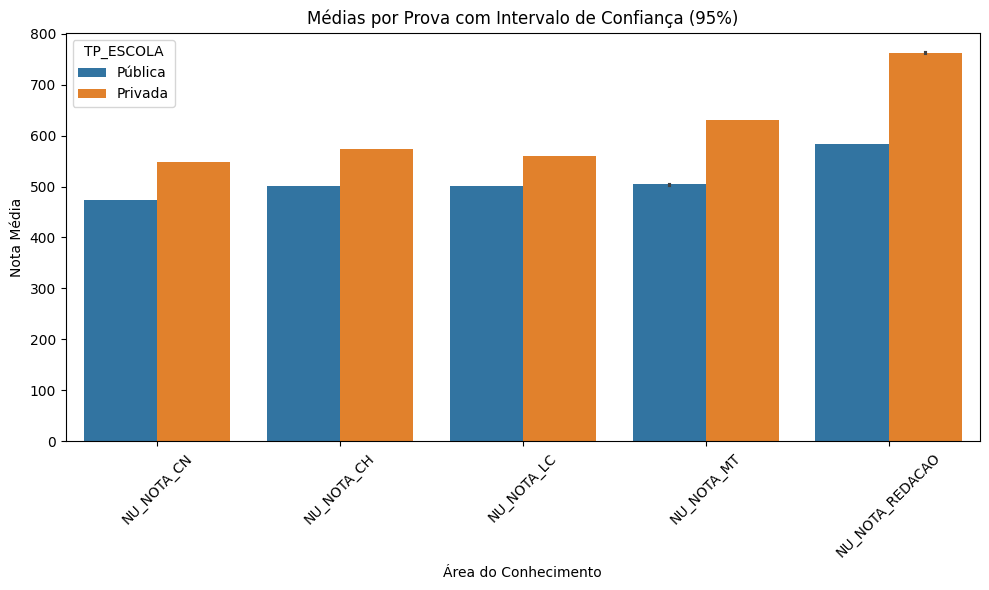

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

media_df = df_pd.melt(id_vars="TP_ESCOLA", value_vars=notas, var_name="Prova", value_name="Nota")

plt.figure(figsize=(10, 6))
sns.barplot(data=media_df, x="Prova", y="Nota", hue="TP_ESCOLA", ci=95, errorbar="ci")
plt.title("Médias por Prova com Intervalo de Confiança (95%)")
plt.ylabel("Nota Média")
plt.xlabel("Área do Conhecimento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
from scipy.stats import rankdata
import numpy as np

def rank_biserial(x, y):
    rx = rankdata(np.concatenate([x, y]))[:len(x)]
    U = np.sum(rx) - len(x)*(len(x)+1)/2
    r = 1 - (2*U)/(len(x)*len(y))
    return r

for nota in notas:
    grupo_pub = df_pd[df_pd["TP_ESCOLA"] == "Pública"][nota].dropna().values
    grupo_priv = df_pd[df_pd["TP_ESCOLA"] == "Privada"][nota].dropna().values
    r = rank_biserial(grupo_pub, grupo_priv)
    print(f"{nota} | Efeito de tamanho (r): {r:.4f}")


NU_NOTA_CN | Efeito de tamanho (r): 0.5110
NU_NOTA_CH | Efeito de tamanho (r): 0.5044
NU_NOTA_LC | Efeito de tamanho (r): 0.4732
NU_NOTA_MT | Efeito de tamanho (r): 0.5497
NU_NOTA_REDACAO | Efeito de tamanho (r): 0.5109


In [13]:
import polars as pl
import pandas as pd

# Caminho do arquivo dos microdados do ENEM

# Colunas necessárias para análise
colunas = [
    "TP_SEXO", "TP_ESCOLA", "TP_COR_RACA", "SG_UF_PROVA",
    "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"
]

# Leitura preguiçosa (lazy) e filtragem inicial
lf = (
    pl.scan_csv(path,
                 separator=';', 
                 encoding='utf8-lossy',)

    .select(colunas)
    .filter(pl.col("TP_ESCOLA").is_in([2, 3]))     # Pública e privada
    .filter(pl.col("TP_SEXO").is_in(["M", "F"]))   # Masculino e feminino
    .filter(pl.col("TP_COR_RACA").is_in([1, 2, 3, 4, 5]))  # Raças válidas
)

# Coleta do LazyFrame em memória
df = lf.collect()

# Conversão para pandas
df_pd = df.to_pandas()

# 🔤 Mapeamento dos códigos para nomes legíveis

# Sexo
df_pd["TP_SEXO"] = df_pd["TP_SEXO"].map({
    "M": "Masculino",
    "F": "Feminino"
})

# Tipo de escola
df_pd["TP_ESCOLA"] = df_pd["TP_ESCOLA"].map({
    2: "Pública",
    3: "Privada"
})

# Raça/cor
df_pd["TP_COR_RACA"] = df_pd["TP_COR_RACA"].map({
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena"
})

# 🔍 Remoção de linhas com qualquer nota ausente
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
df_pd = df_pd.dropna(subset=notas)

# 🔢 Conversão explícita das notas para float
df_pd[notas] = df_pd[notas].apply(pd.to_numeric, errors="coerce")


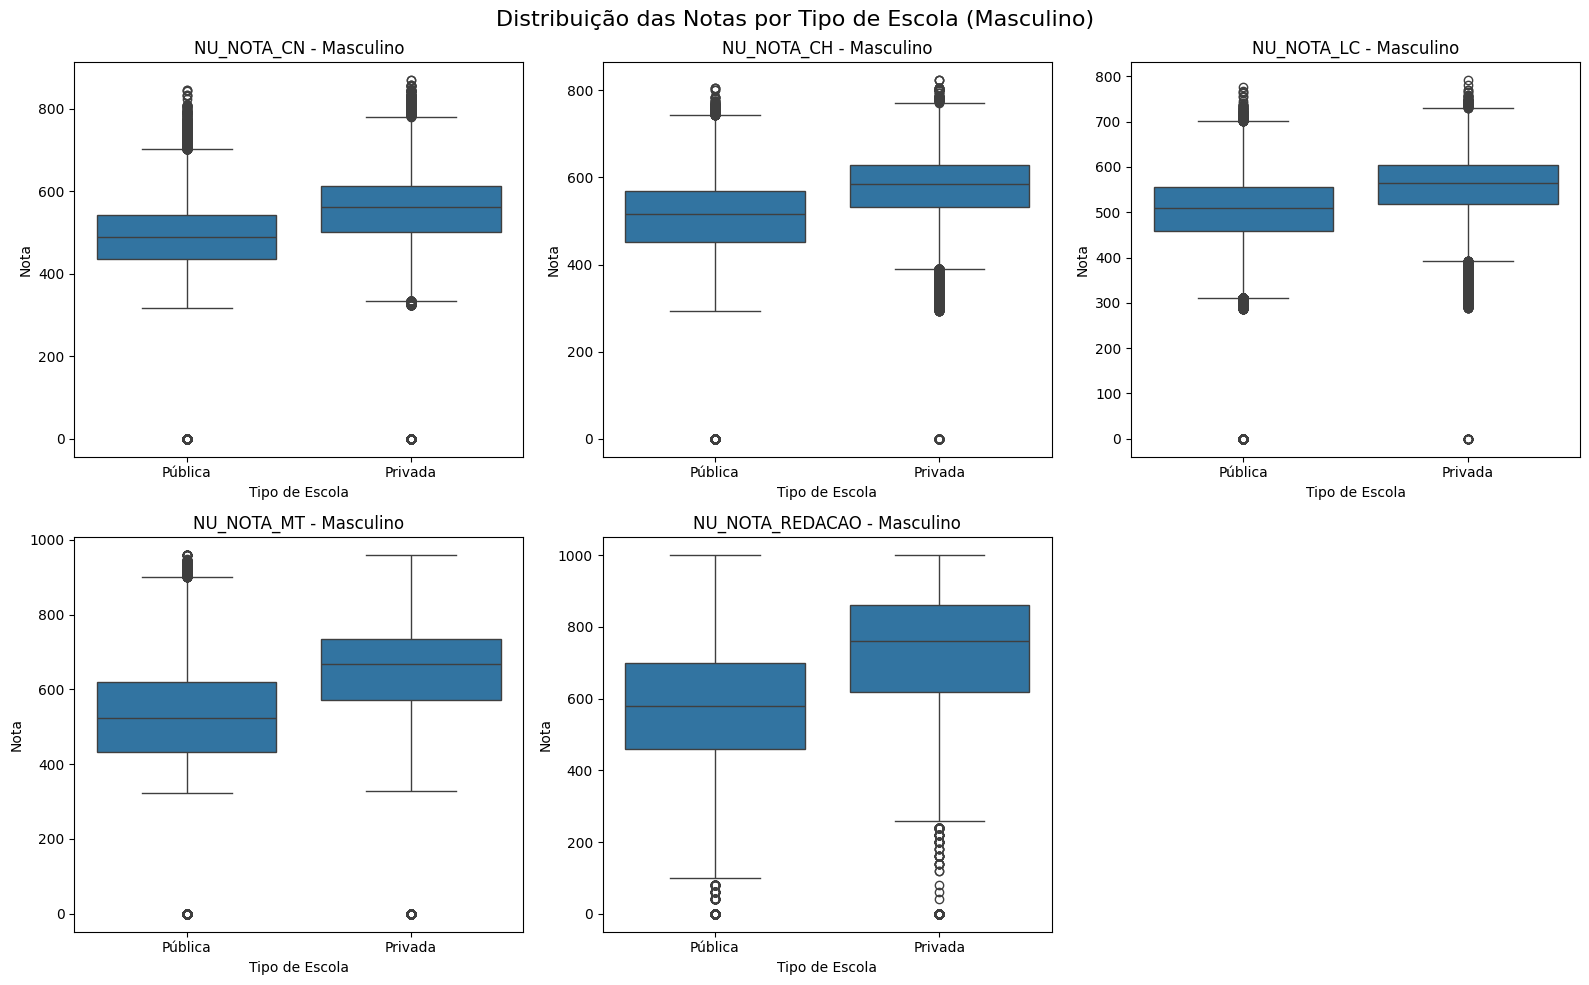

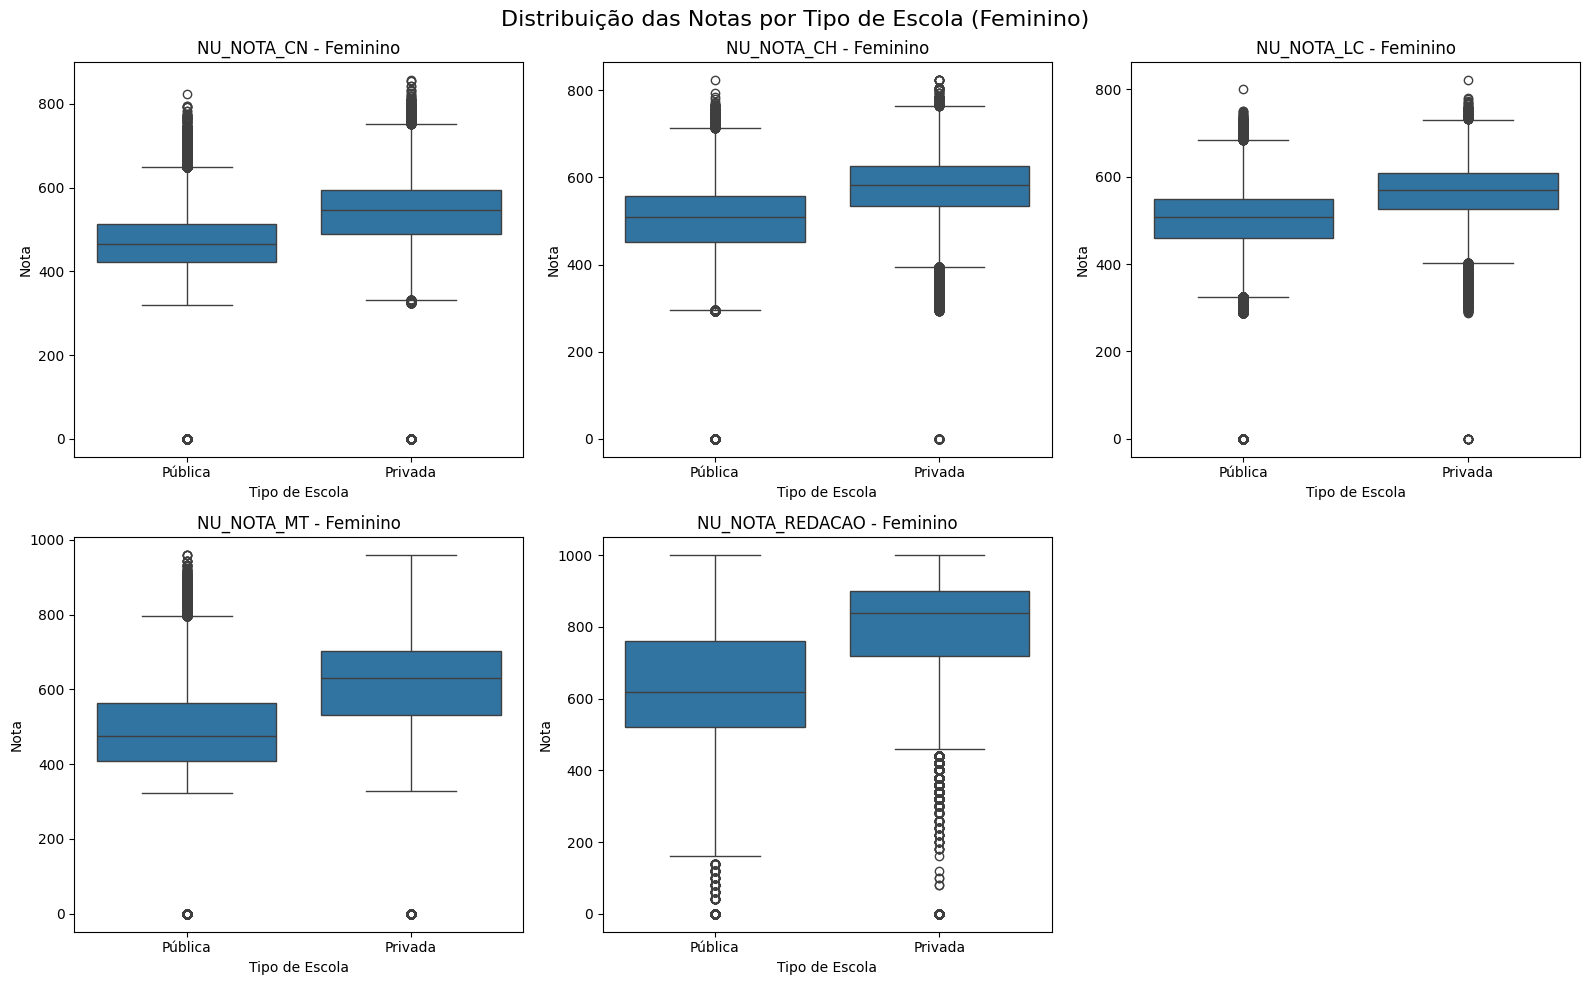

/tmp/ipykernel_407808/1355382773.py:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




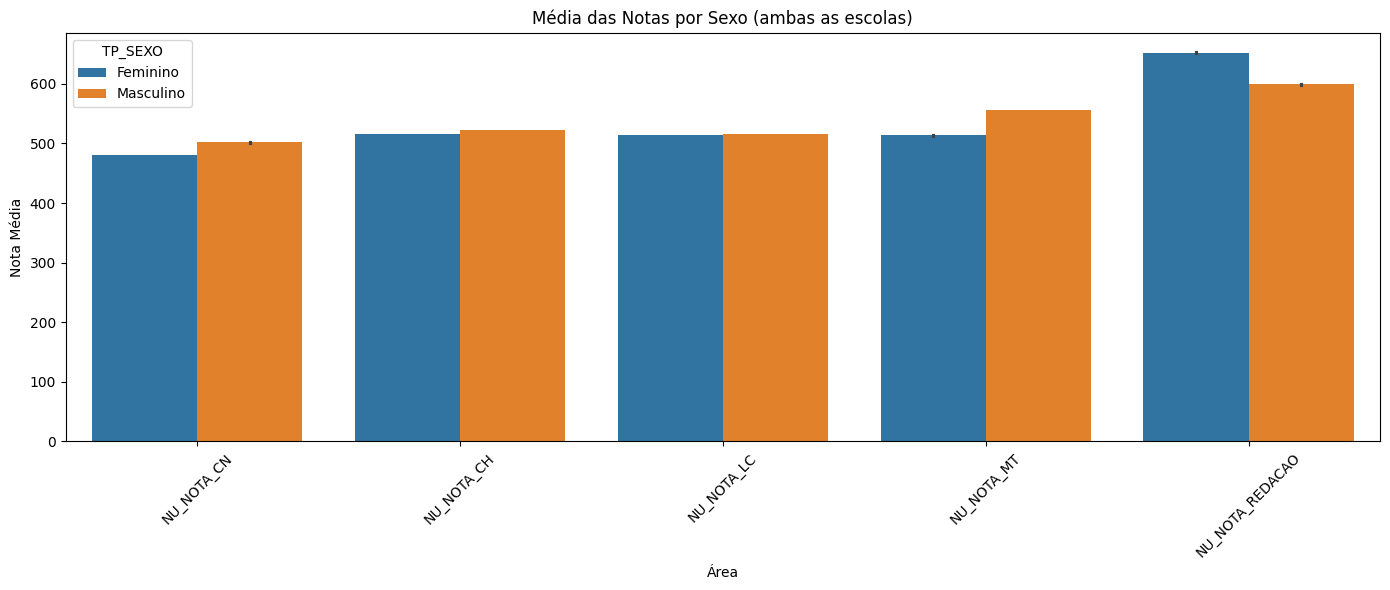

/tmp/ipykernel_407808/1355382773.py:33: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




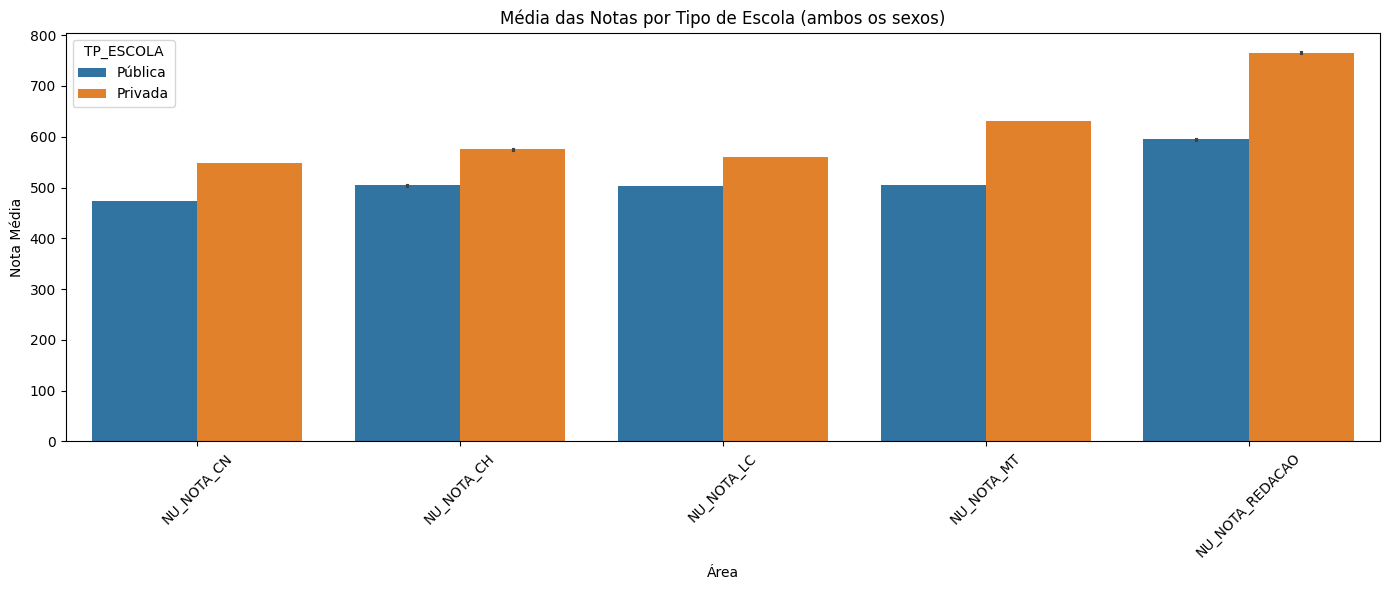

/tmp/ipykernel_407808/1355382773.py:42: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




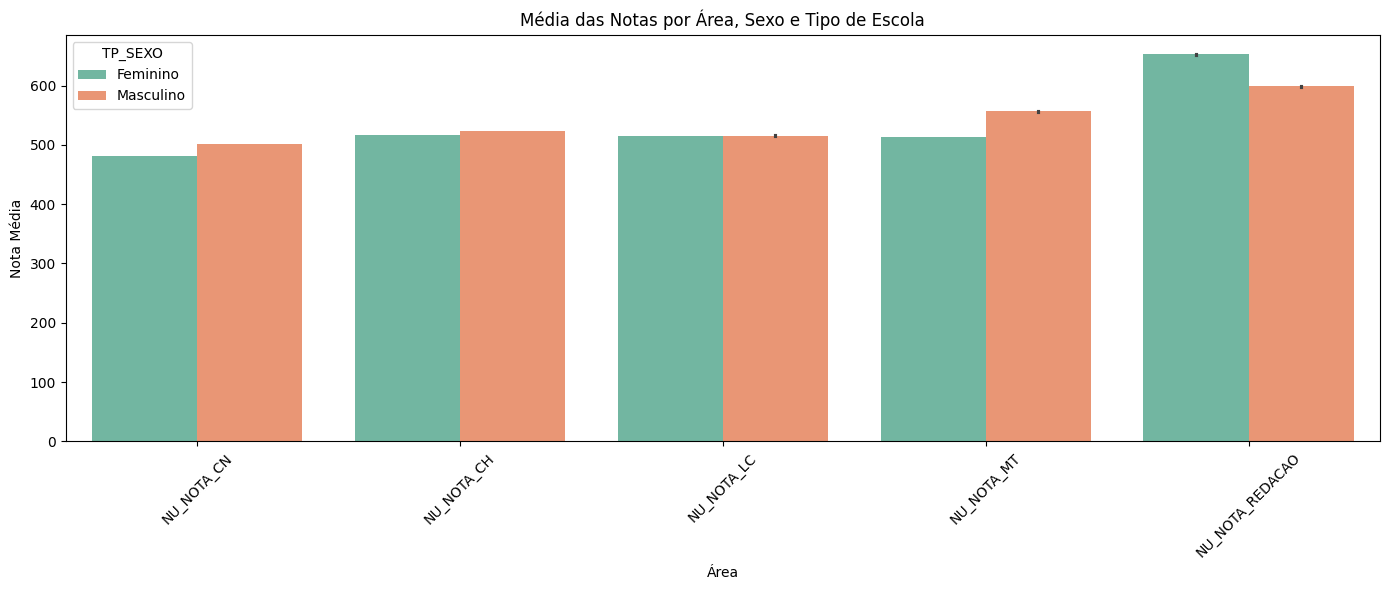

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de notas
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

# 🔹 1. Boxplots separados por gênero
for sexo in ["Masculino", "Feminino"]:
    plt.figure(figsize=(16, 10))
    for i, nota in enumerate(notas, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data=df_pd[df_pd["TP_SEXO"] == sexo], x="TP_ESCOLA", y=nota)
        plt.title(f"{nota} - {sexo}")
        plt.xlabel("Tipo de Escola")
        plt.ylabel("Nota")
    plt.suptitle(f"Distribuição das Notas por Tipo de Escola ({sexo})", fontsize=16)
    plt.tight_layout()
    plt.show()

# 🔹 2. Gráfico de barras com médias e IC 95% por nota, separado por sexo e tipo de escola
df_melt = df_pd.melt(id_vars=["TP_SEXO", "TP_ESCOLA"], value_vars=notas, 
                     var_name="Área", value_name="Nota")

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="TP_SEXO", ci=95, errorbar="ci")
plt.title("Média das Notas por Sexo (ambas as escolas)")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="TP_ESCOLA", ci=95, errorbar="ci")
plt.title("Média das Notas por Tipo de Escola (ambos os sexos)")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔹 3. Interação ESCOLA x SEXO (mais detalhado)
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="TP_SEXO", ci=95, errorbar="ci", 
            palette="Set2", dodge=True)
plt.title("Média das Notas por Área, Sexo e Tipo de Escola")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


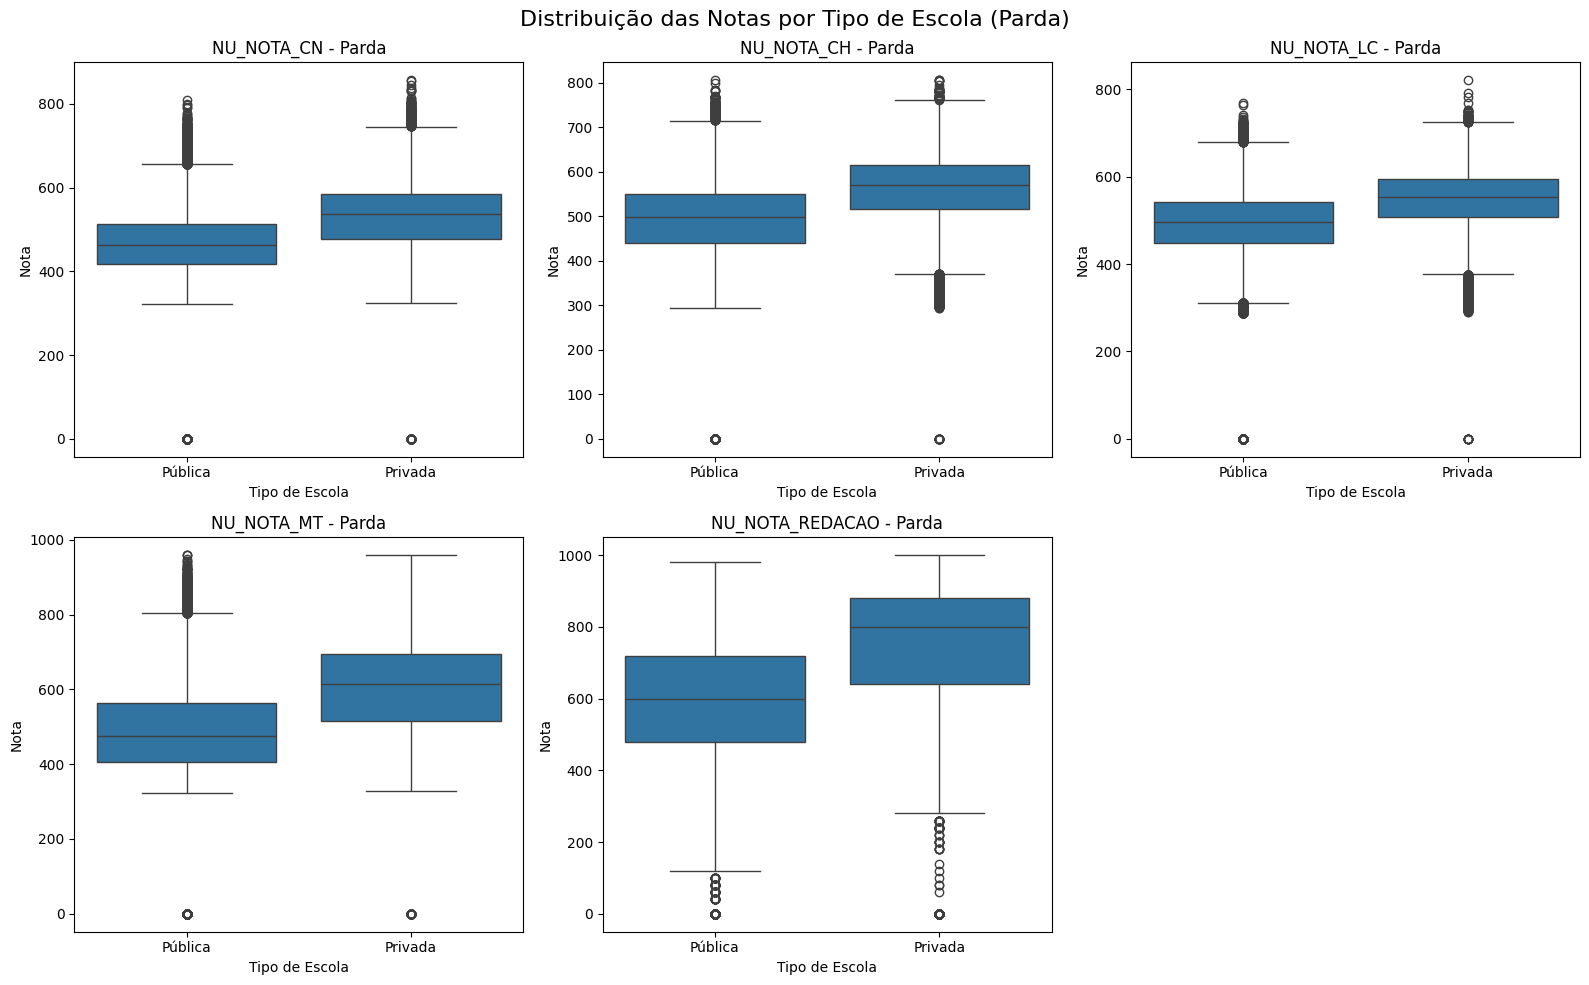

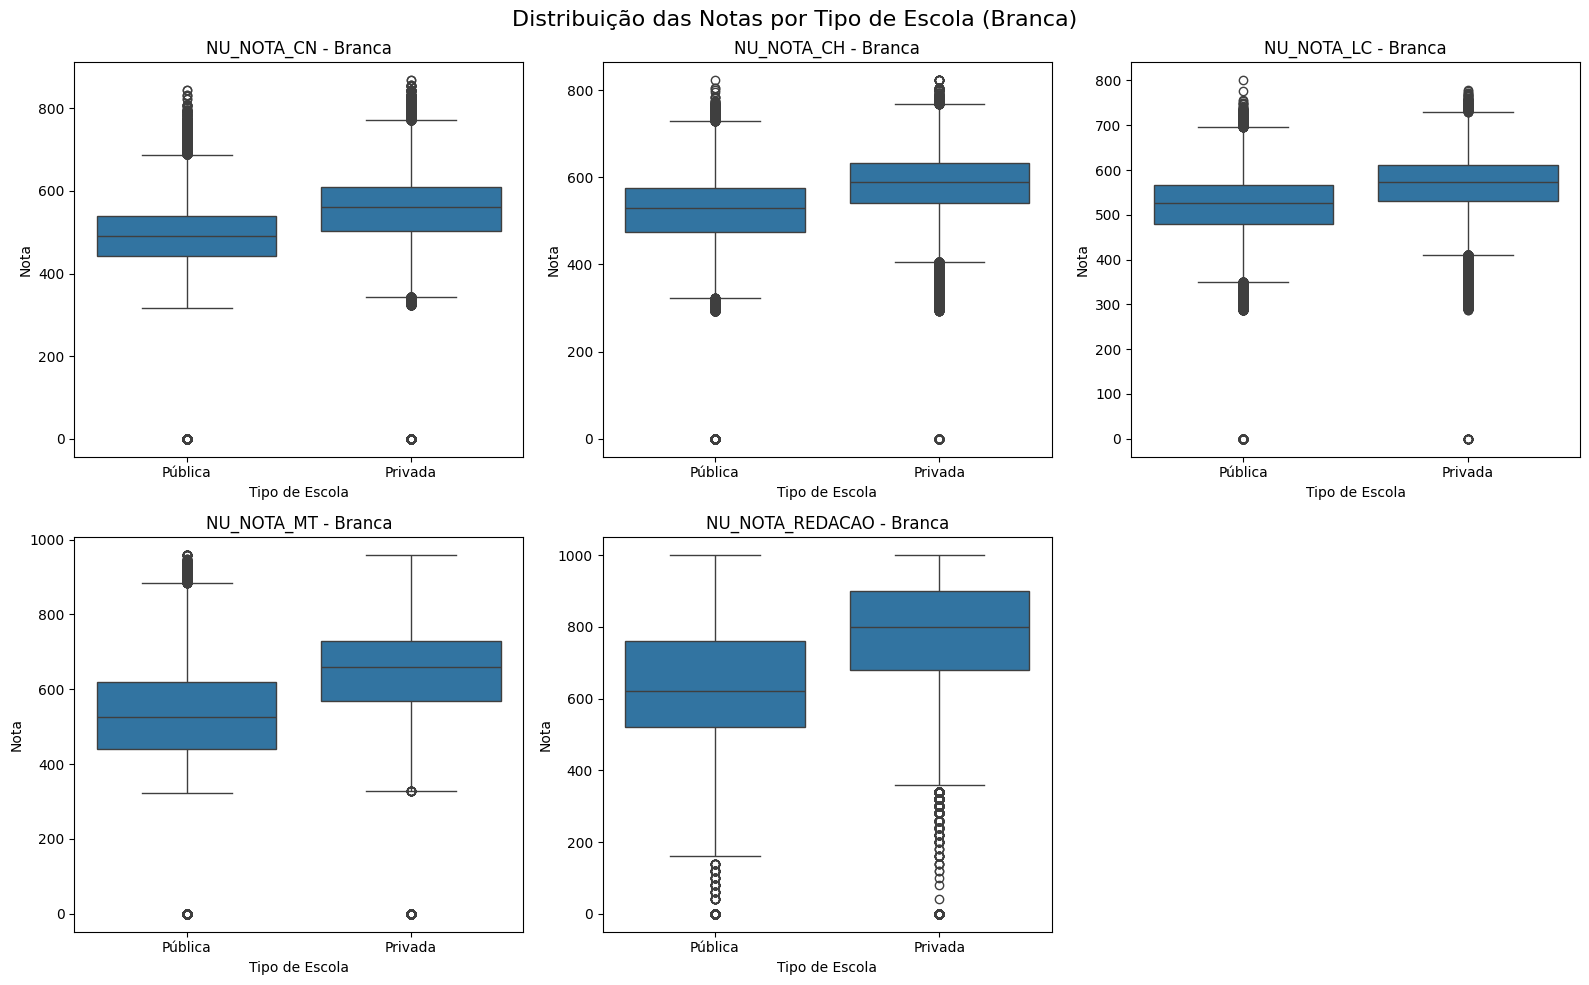

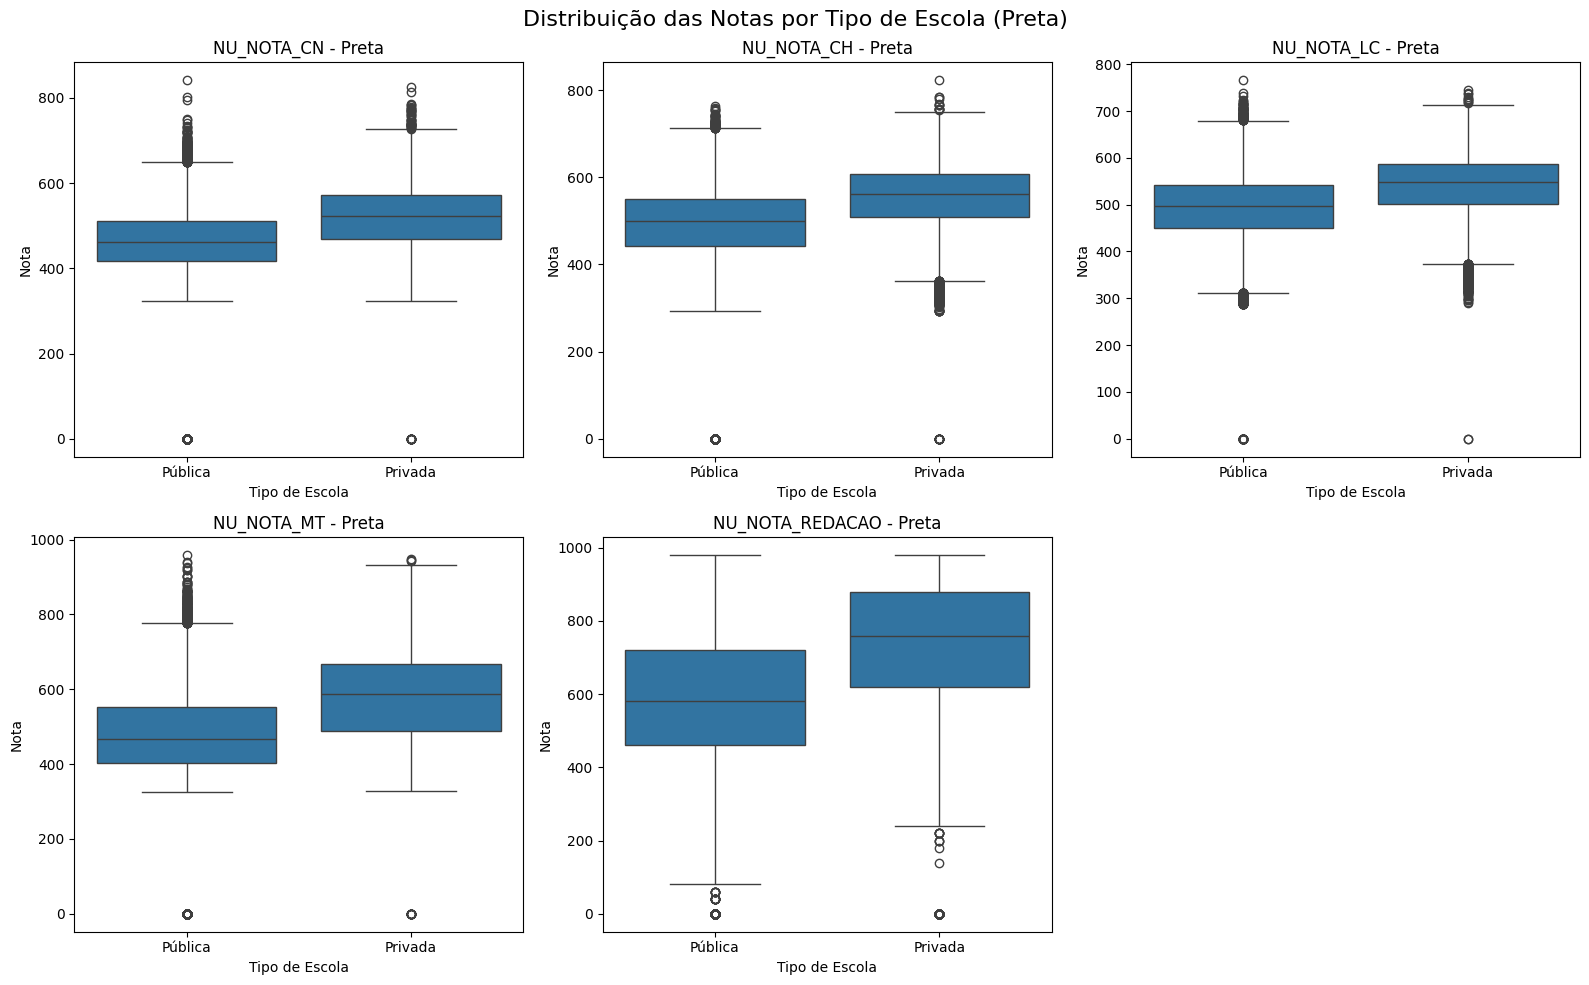

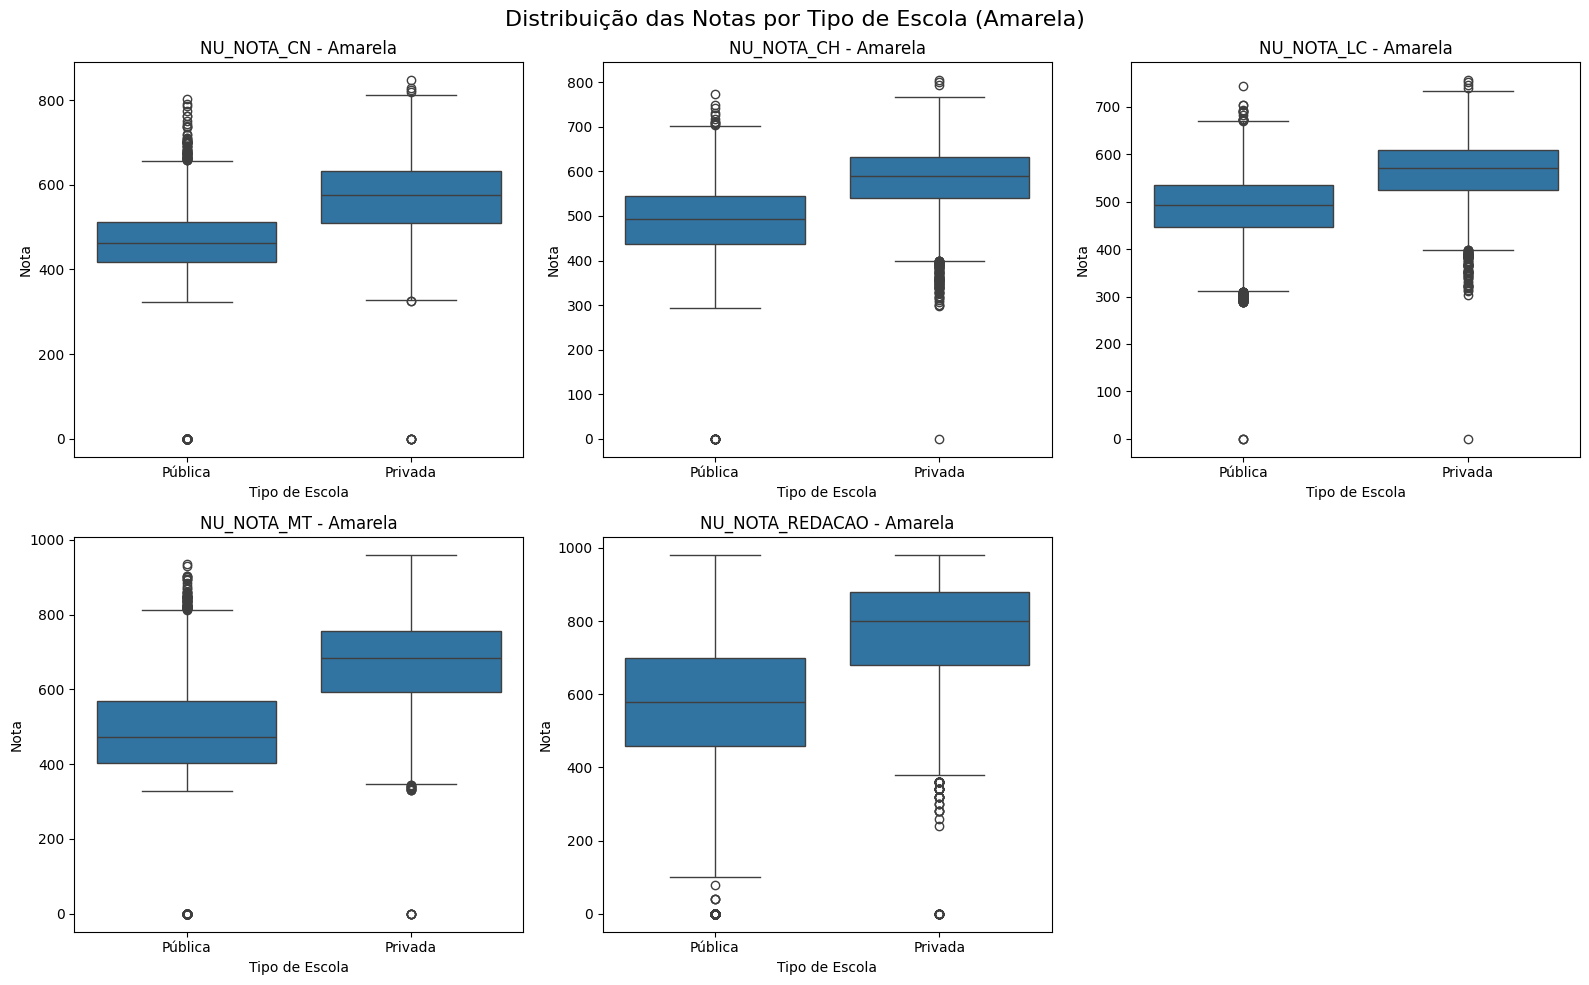

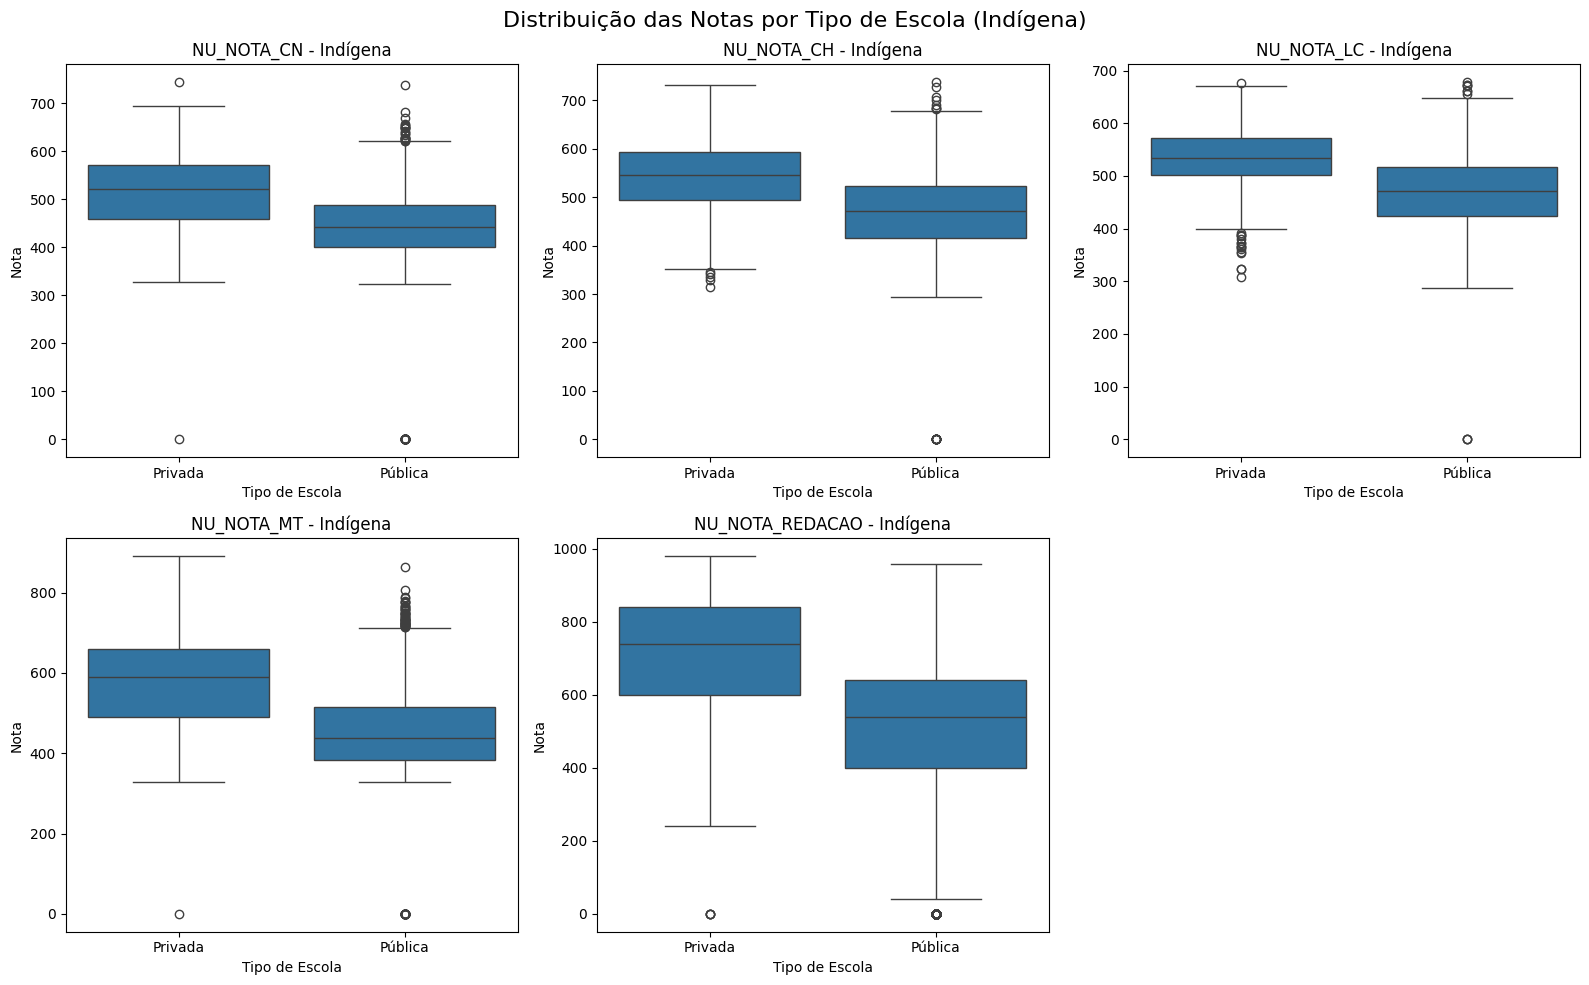

/tmp/ipykernel_407808/1782102832.py:29: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




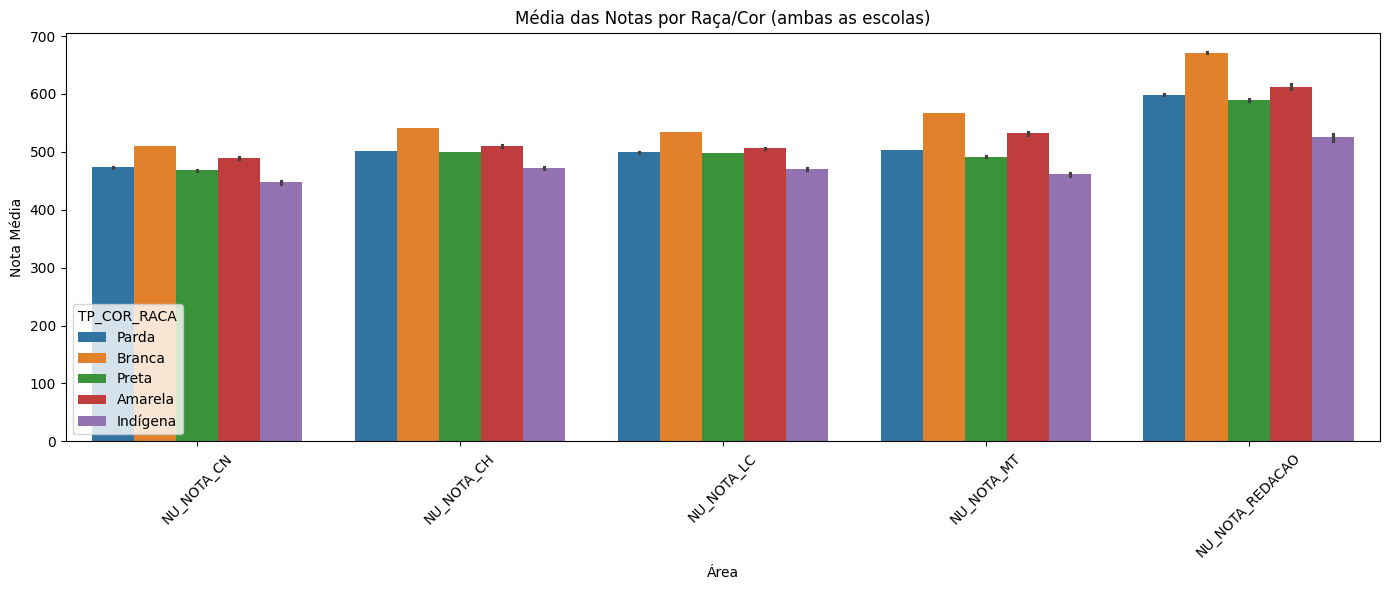

/tmp/ipykernel_407808/1782102832.py:37: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




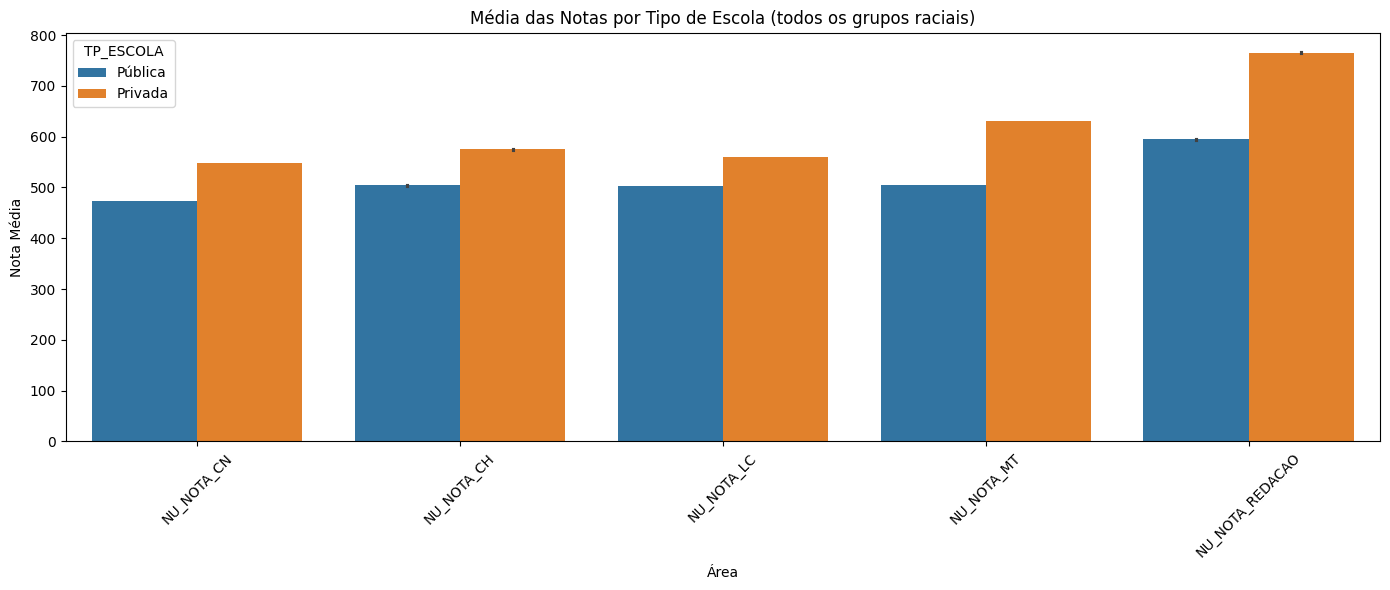

/tmp/ipykernel_407808/1782102832.py:46: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




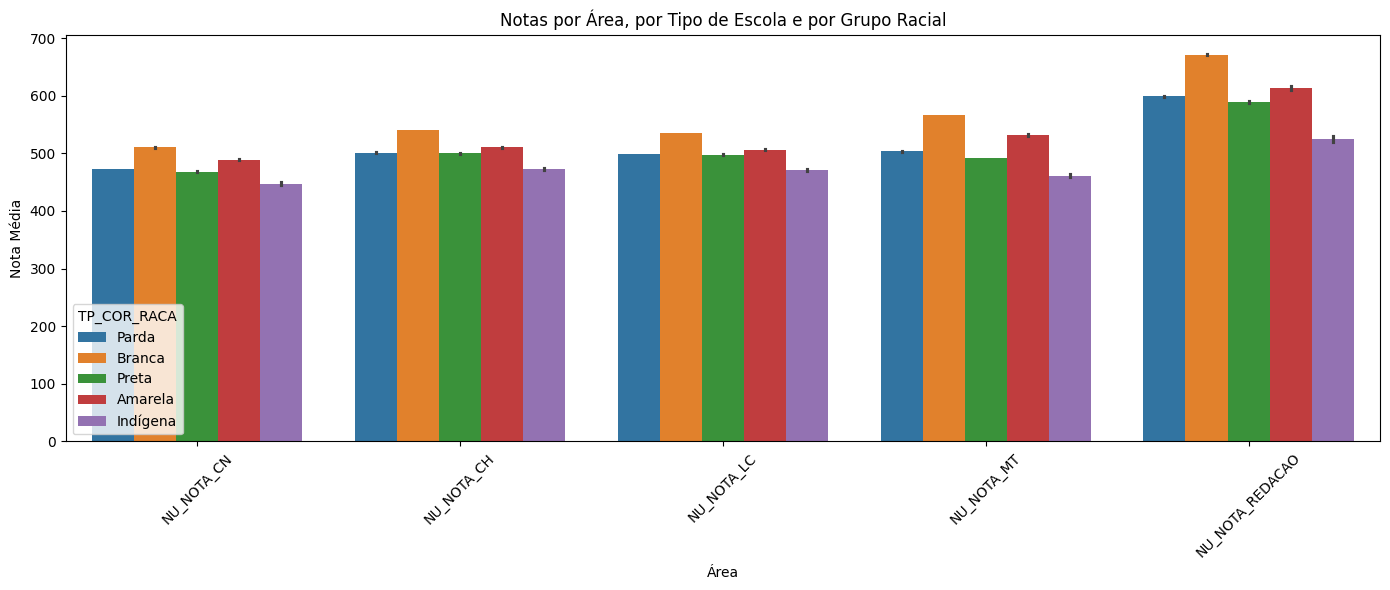

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 1. Boxplots de notas por tipo de escola, separados por raça
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

for raca in df_pd["TP_COR_RACA"].unique():
    plt.figure(figsize=(16, 10))
    for i, nota in enumerate(notas, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(
            data=df_pd[df_pd["TP_COR_RACA"] == raca],
            x="TP_ESCOLA",
            y=nota
        )
        plt.title(f"{nota} - {raca}")
        plt.xlabel("Tipo de Escola")
        plt.ylabel("Nota")
    plt.suptitle(f"Distribuição das Notas por Tipo de Escola ({raca})", fontsize=16)
    plt.tight_layout()
    plt.show()

# 🔹 2. Gráfico de barras com médias por raça + tipo de escola (interação)
df_melt = df_pd.melt(id_vars=["TP_COR_RACA", "TP_ESCOLA"], 
                     value_vars=notas, 
                     var_name="Área", value_name="Nota")

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="TP_COR_RACA", ci=95, errorbar="ci")
plt.title("Média das Notas por Raça/Cor (ambas as escolas)")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="TP_ESCOLA", ci=95, errorbar="ci")
plt.title("Média das Notas por Tipo de Escola (todos os grupos raciais)")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔹 3. Interação ESCOLA x RAÇA
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="TP_COR_RACA", ci=95, errorbar="ci", dodge=True)
plt.title("Notas por Área, por Tipo de Escola e por Grupo Racial")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_407808/3136136280.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




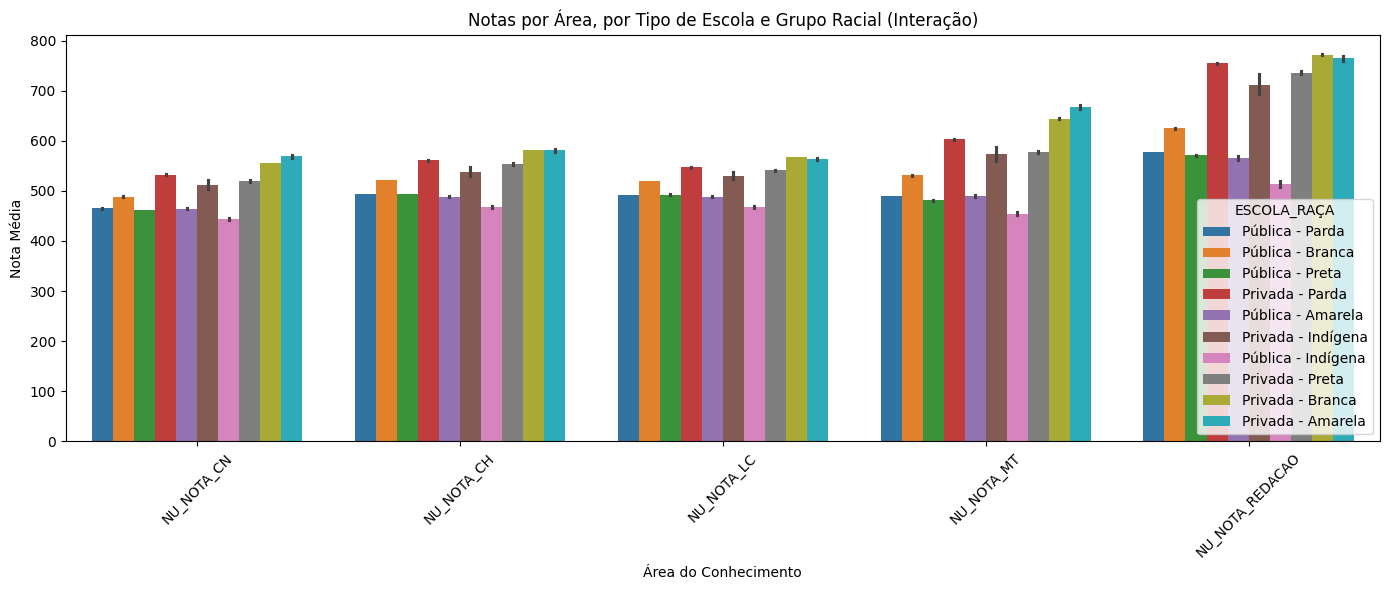

In [16]:
# Criar coluna de interação
df_melt["ESCOLA_RAÇA"] = df_melt["TP_ESCOLA"] + " - " + df_melt["TP_COR_RACA"]

# Gráfico de barras com a interação ESCOLA x RAÇA
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="ESCOLA_RAÇA", ci=95, errorbar="ci", dodge=True)
plt.title("Notas por Área, por Tipo de Escola e Grupo Racial (Interação)")
plt.ylabel("Nota Média")
plt.xlabel("Área do Conhecimento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_407808/3881546660.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




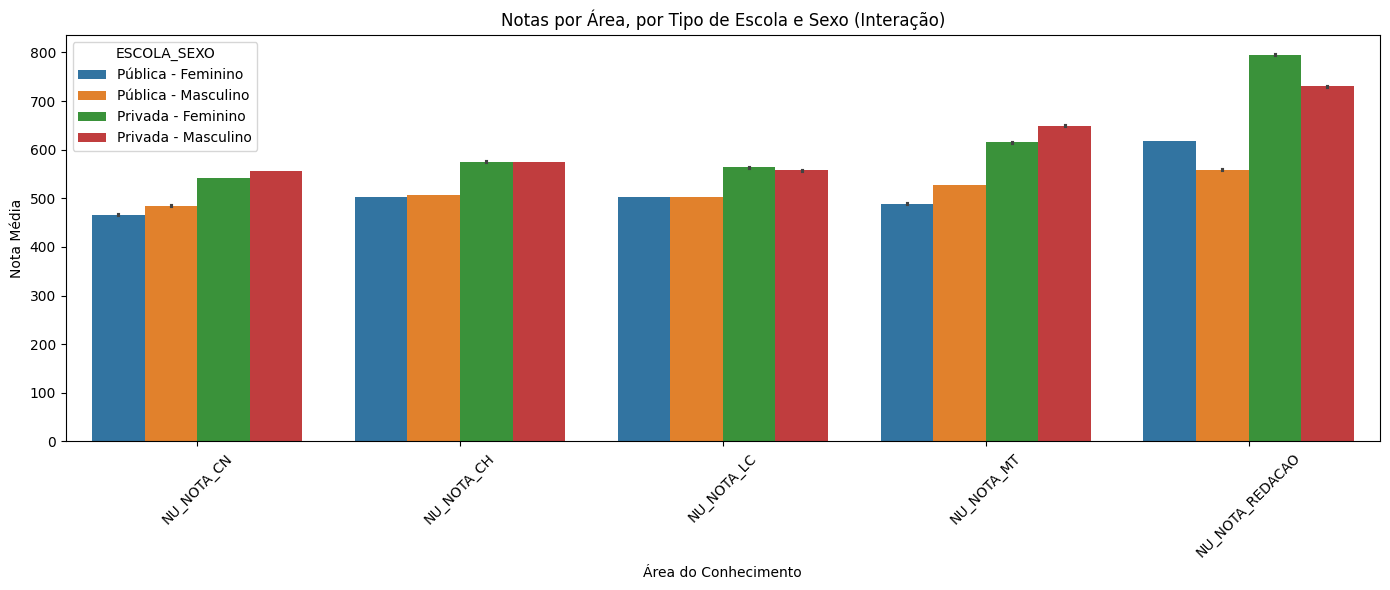

In [17]:
# Criar coluna de interação
df_melt = df_pd.melt(id_vars=["TP_SEXO", "TP_ESCOLA"], value_vars=notas, 
                     var_name="Área", value_name="Nota")
df_melt["ESCOLA_SEXO"] = df_melt["TP_ESCOLA"] + " - " + df_melt["TP_SEXO"]

# Gráfico de barras com a interação ESCOLA x RAÇA
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x="Área", y="Nota", hue="ESCOLA_SEXO", ci=95, errorbar="ci", dodge=True)
plt.title("Notas por Área, por Tipo de Escola e Sexo (Interação)")
plt.ylabel("Nota Média")
plt.xlabel("Área do Conhecimento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Calcula a média das notas por UF e tipo de escola
medias_uf = (
    df_pd.groupby(["SG_UF_PROVA", "TP_ESCOLA"])
         [["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
         .mean()
         .reset_index()
         .melt(id_vars=["SG_UF_PROVA", "TP_ESCOLA"], 
               var_name="Área", value_name="Nota Média")
)


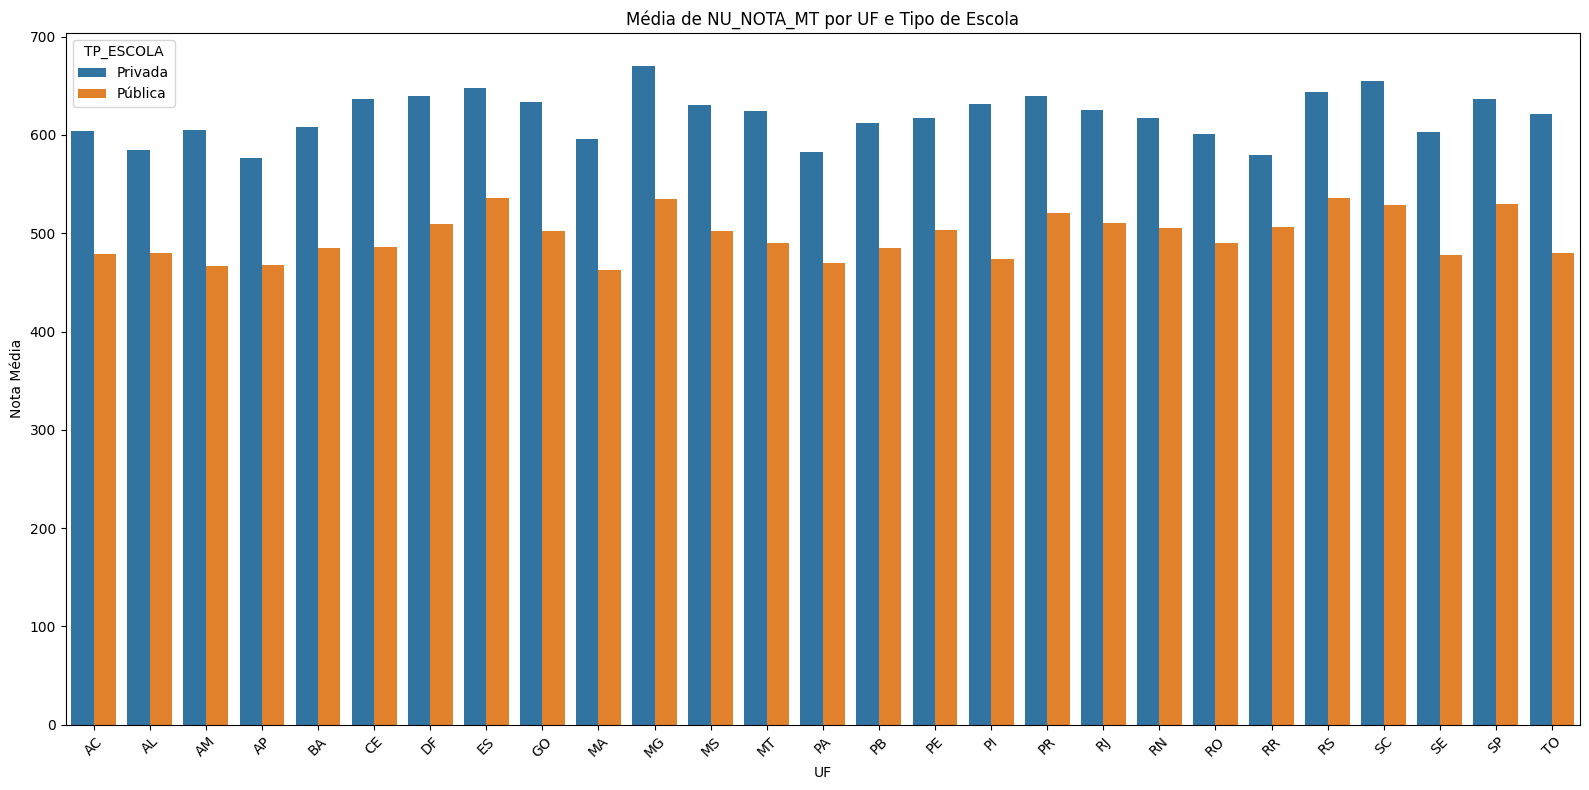

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo para uma área específica
area = "NU_NOTA_MT"

plt.figure(figsize=(16, 8))
sns.barplot(data=medias_uf[medias_uf["Área"] == area], 
            x="SG_UF_PROVA", y="Nota Média", hue="TP_ESCOLA", errorbar=None)
plt.title(f"Média de {area} por UF e Tipo de Escola")
plt.xticks(rotation=45)
plt.ylabel("Nota Média")
plt.xlabel("UF")
plt.tight_layout()
plt.show()


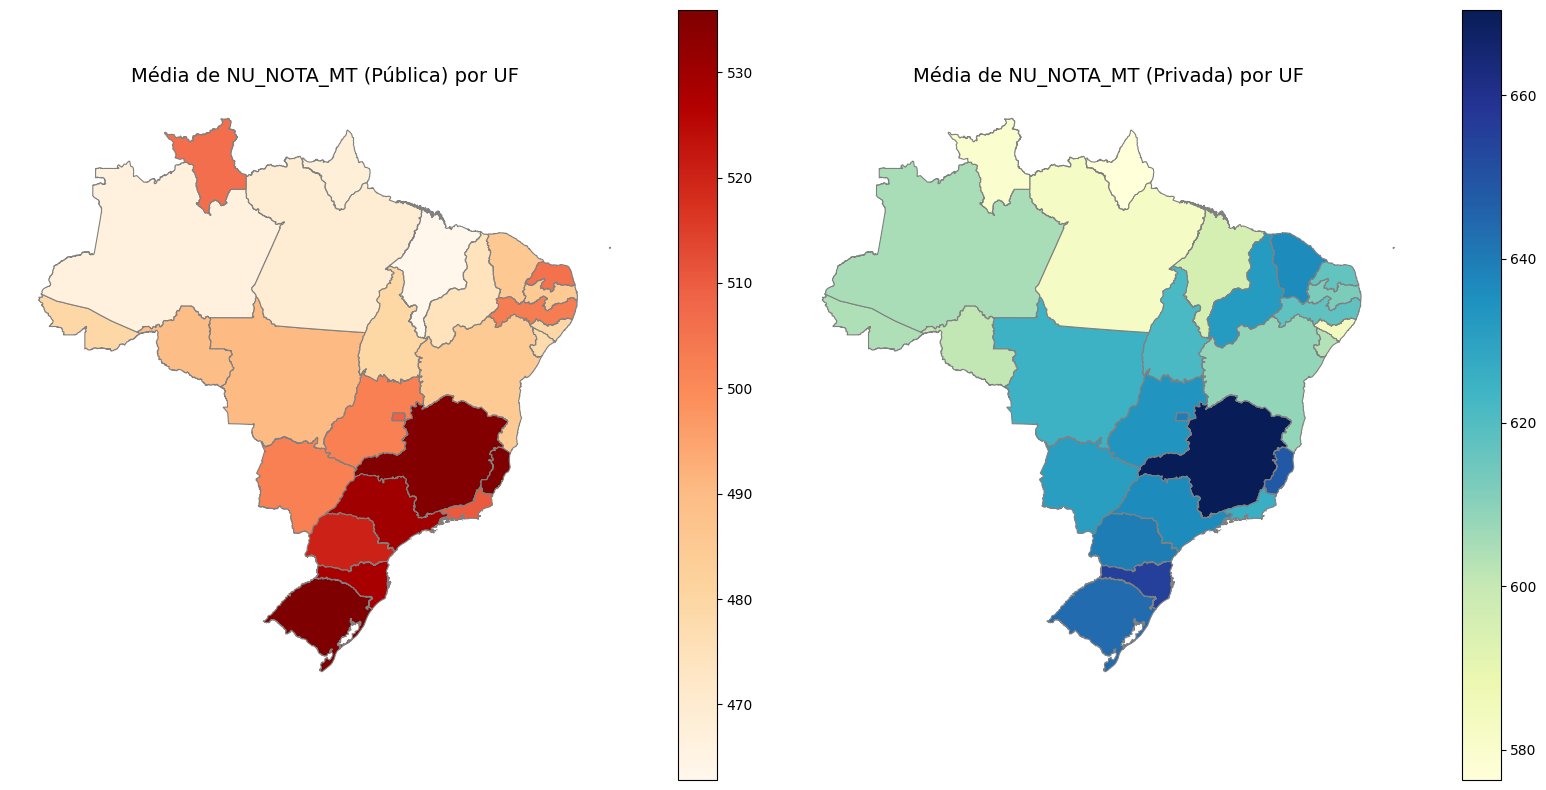

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Agrupar médias por UF e tipo de escola (se ainda não tiver) ---
# Supondo que você já tenha o DataFrame `medias_uf` conforme abaixo:
#
# medias_uf = (
#     df_pd.groupby(["SG_UF_PROVA", "TP_ESCOLA"])
#          [["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]]
#          .mean()
#          .reset_index()
#          .melt(id_vars=["SG_UF_PROVA","TP_ESCOLA"],
#                var_name="Área", value_name="Nota Média")
# )

# Exemplo de pivot para uma área, digamos Matemática:
area = "NU_NOTA_MT"
df_map = (
    medias_uf[medias_uf["Área"] == area]
    .pivot(index="SG_UF_PROVA", columns="TP_ESCOLA", values="Nota Média")
    .reset_index()
)

# --- 2. Carregar GeoJSON dos estados brasileiros ---
# Use o GeoJSON público (você pode baixá-lo localmente ou apontar direto para a URL)
# Aqui usamos o repositório Code for America:
url_geojson = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf_states = gpd.read_file(url_geojson)

# Esse GeoJSON tem a coluna 'name' com o nome completo do estado.
# Vamos criar uma coluna de sigla para casar com SG_UF_PROVA.
# Crie um dicionário de mapeamento nome → sigla:
nome_para_sigla = {
    "Acre": "AC", "Alagoas": "AL", "Amapá": "AP", "Amazonas": "AM",
    "Bahia": "BA", "Ceará": "CE", "Distrito Federal": "DF", "Espírito Santo": "ES",
    "Goiás": "GO", "Maranhão": "MA", "Mato Grosso": "MT", "Mato Grosso do Sul": "MS",
    "Minas Gerais": "MG", "Pará": "PA", "Paraíba": "PB", "Paraná": "PR",
    "Pernambuco": "PE", "Piauí": "PI", "Rio de Janeiro": "RJ", "Rio Grande do Norte": "RN",
    "Rio Grande do Sul": "RS", "Rondônia": "RO", "Roraima": "RR", "Santa Catarina": "SC",
    "São Paulo": "SP", "Sergipe": "SE", "Tocantins": "TO"
}
gdf_states["SG_UF_PROVA"] = gdf_states["name"].map(nome_para_sigla)

# --- 3. Mesclar médias com geometria ---
gdf_map = gdf_states.merge(df_map, on="SG_UF_PROVA", how="left")

# --- 4. Plot choropleth para Escolas Públicas e Privadas ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
for ax, escola in zip(axes, ["Pública", "Privada"]):
    gdf_map.plot(
        column=escola,
        cmap="OrRd" if escola=="Pública" else "YlGnBu",
        linewidth=0.8,
        edgecolor="gray",
        legend=True,
        ax=ax
    )
    ax.set_title(f"Média de {area} ({escola}) por UF", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()


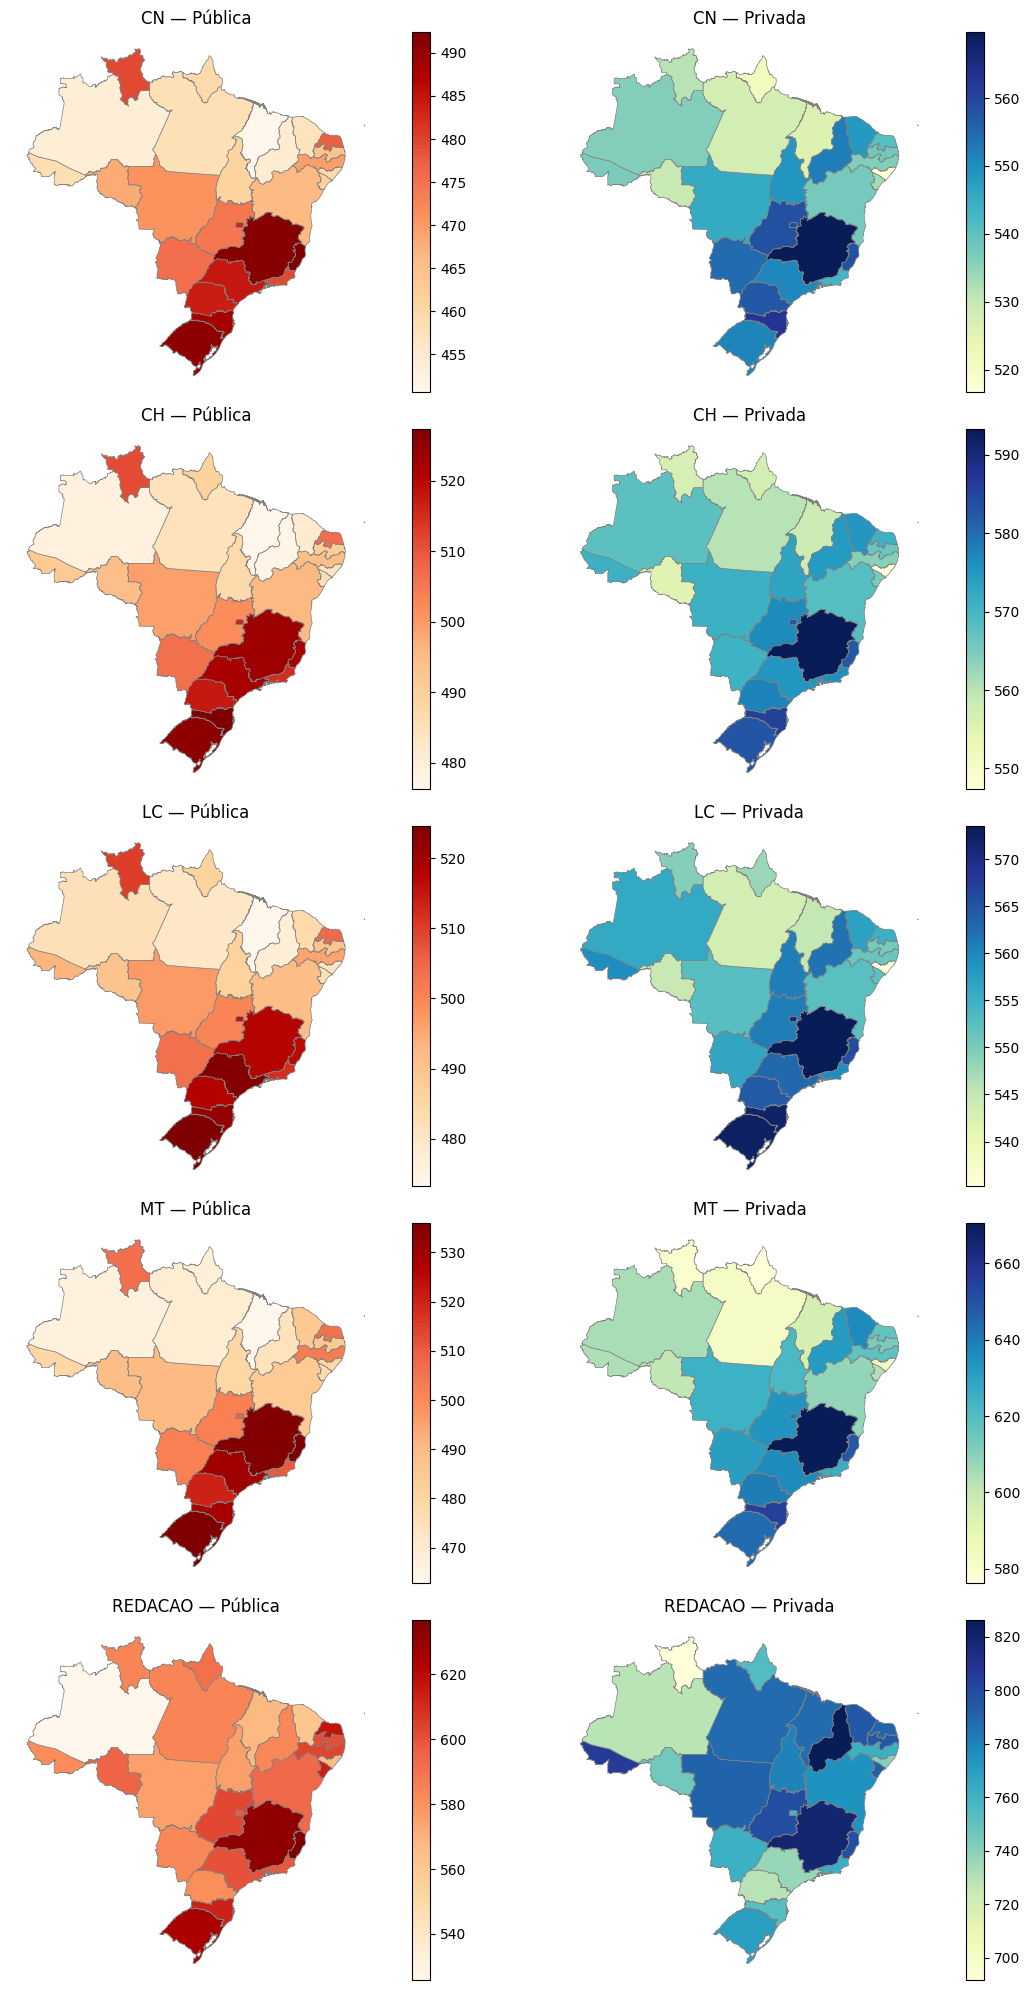

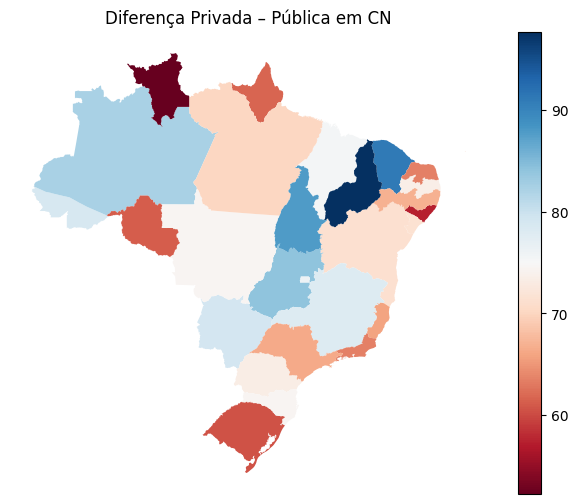

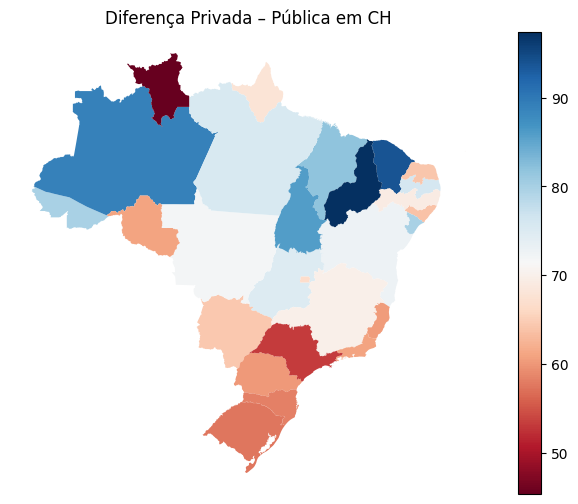

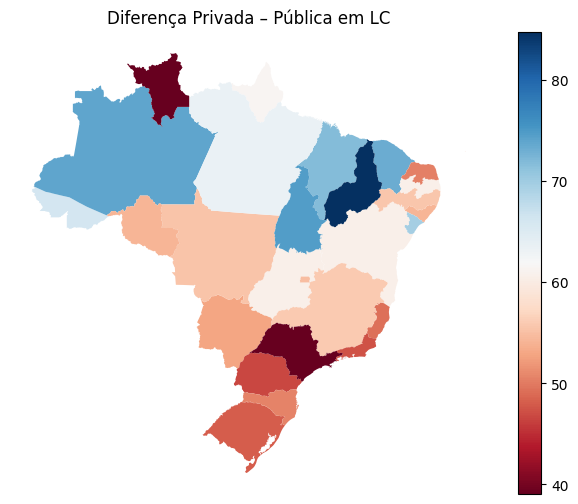

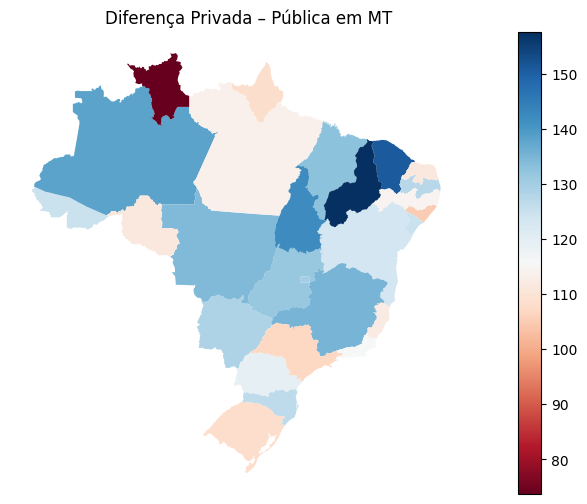

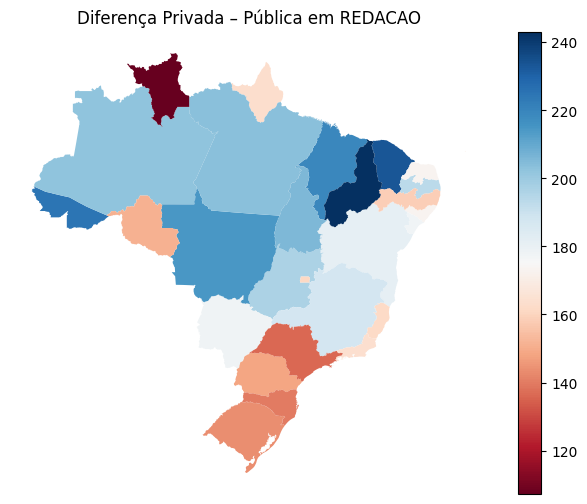

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Preparar o DataFrame de médias por UF e tipo de escola ---
medias_uf = (
    df_pd
    .groupby(["SG_UF_PROVA", "TP_ESCOLA"])
    [["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]]
    .mean()
    .reset_index()
)

# Pivot para ter colunas 'Pública' e 'Privada'
df_map = medias_uf.pivot(
    index="SG_UF_PROVA",
    columns="TP_ESCOLA",
    values=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]
)
# Ajustar nomes de coluna
df_map.columns = [f"{area}_{esc}" for area, esc in df_map.columns]
df_map = df_map.reset_index()

# --- 2. Carregar GeoJSON dos estados brasileiros ---
url_geojson = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf_states = gpd.read_file(url_geojson)

# Mapear nome completo → sigla
nome_para_sigla = {
    "Acre": "AC", "Alagoas": "AL", "Amapá": "AP", "Amazonas": "AM",
    "Bahia": "BA", "Ceará": "CE", "Distrito Federal": "DF", "Espírito Santo": "ES",
    "Goiás": "GO", "Maranhão": "MA", "Mato Grosso": "MT", "Mato Grosso do Sul": "MS",
    "Minas Gerais": "MG", "Pará": "PA", "Paraíba": "PB", "Paraná": "PR",
    "Pernambuco": "PE", "Piauí": "PI", "Rio de Janeiro": "RJ", "Rio Grande do Norte": "RN",
    "Rio Grande do Sul": "RS", "Rondônia": "RO", "Roraima": "RR", "Santa Catarina": "SC",
    "São Paulo": "SP", "Sergipe": "SE", "Tocantins": "TO"
}
gdf_states["SG_UF_PROVA"] = gdf_states["name"].map(nome_para_sigla)

# Merge geometria + dados
gdf_map = gdf_states.merge(df_map, on="SG_UF_PROVA", how="left")

# Lista de áreas
areas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]

# --- 3. Grid de subplots: Pública vs Privada para cada área ---
n = len(areas)
fig, axes = plt.subplots(n, 2, figsize=(12, 4*n))
for i, area in enumerate(areas):
    for j, escola in enumerate(["Pública", "Privada"]):
        col = f"{area}_{escola}"
        ax = axes[i, j]
        gdf_map.plot(
            column=col,
            cmap="OrRd" if escola == "Pública" else "YlGnBu",
            linewidth=0.5,
            edgecolor="gray",
            legend=True,
            ax=ax
        )
        ax.set_title(f"{area.split('_')[-1]} — {escola}")
        ax.axis("off")
plt.tight_layout()
plt.show()

# --- 4. Choropleth da diferença (Privada – Pública) para cada área ---
# Criar colunas de diferença
for area in areas:
    gdf_map[f"{area}_diff"] = gdf_map[f"{area}_Privada"] - gdf_map[f"{area}_Pública"]

# Vamos plotar só uma (exemplo Matemática), mas o loop seria análogo

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    gdf_map.plot(
        column=f"{area}_diff",
        cmap="RdBu",
        legend=True,
        ax=ax
    )
    ax.set_title(f"Diferença Privada – Pública em {area.split('_')[-1]}")
    ax.axis("off")
    plt.show()



In [26]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [28]:
import statsmodels.formula.api as smf
import pandas as pd

# As mesmas colunas que já temos em df_pd
areas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]


In [29]:
# Dicionário para armazenar os resultados
modelos = {}

for area in areas:
    # Fórmula: nota ~ escola + sexo + raça + UF
    formula = (
        f"{area} ~ C(TP_ESCOLA) + C(TP_SEXO) + "
        f"C(TP_COR_RACA) + C(SG_UF_PROVA)"
    )
    # Ajuste OLS
    modelo = smf.ols(formula, data=df_pd).fit()
    modelos[area] = modelo
    
    # Exibe sumário resumido
    print(f"\n—— Modelo para {area.split('_')[-1]} ——")
    print(modelo.summary().tables[1])  # exibe apenas tabela de coeficientes



—— Modelo para CN ——
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    520.0573      1.260    412.846      0.000     517.588     522.526
C(TP_ESCOLA)[T.Pública]      -64.8558      0.194   -335.102      0.000     -65.235     -64.476
C(TP_SEXO)[T.Masculino]       18.1199      0.154    117.767      0.000      17.818      18.421
C(TP_COR_RACA)[T.Branca]      11.1517      0.624     17.867      0.000       9.928      12.375
C(TP_COR_RACA)[T.Indígena]   -27.1894      1.198    -22.695      0.000     -29.537     -24.841
C(TP_COR_RACA)[T.Parda]       -6.9634      0.625    -11.148      0.000      -8.188      -5.739
C(TP_COR_RACA)[T.Preta]      -14.0977      0.655    -21.537      0.000     -15.381     -12.815
C(SG_UF_PROVA)[T.AL]          -2.0093      1.223     -1.643      0.100      -4.406       0.388
C(SG_UF_PROVA)[T.AM]        